# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**
1. Оценить ситуацию на рынке недвижимости Санкт-Петербурга и Ленинградской области: выявить типичные параметры недвижимости в городе, определить средний срок подажи объекта недвижимости.
2. Установить, какие факторы влияют на ценнообразование на рынке недвижимости Санкт-Петербурга.
3. Выявить населенные пункты с максимальной и минимальной стоимостью кв.м недвижимоси.

**Ход исследования**
1. Изучить информацию о файле, выявить пропуски в данных, устранить дубликаты и аномалии.
2. Произвести расчет дополнительных параметров для анализа и дополнить таблицу столбцами (например, с ценой объектов недвижимости за кв.м)
3. Изучить параметры объектов недвижимости и время продажи объектов в регионе в целом.
4. Выявить факторы, влияющие на общую (полную) стоимость объекта.
5. Определить регионы с максимальной и минимальной стоимостью недвижимости.
6. Проанализировать стоимость недвижимости в Санкт-Петербурге.


### 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
try:
    data = pd.read_csv('C:/Users/user/Desktop/123/Исследование объявлений о продаже квартир/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Файл содержит 23699 строк, т.е. информацию о 23699 квартирах и 22 колонки с различными характеристиками квартир.
Данные содержат много пропусков. Только в 8 колонках представлена полная информация, остальные содержат пропуски.
информация представлена 4 типов: bool, float64, int64, object. 
Скорее всего колонку first_day_exposition необходимо будет привести к виду datetime.


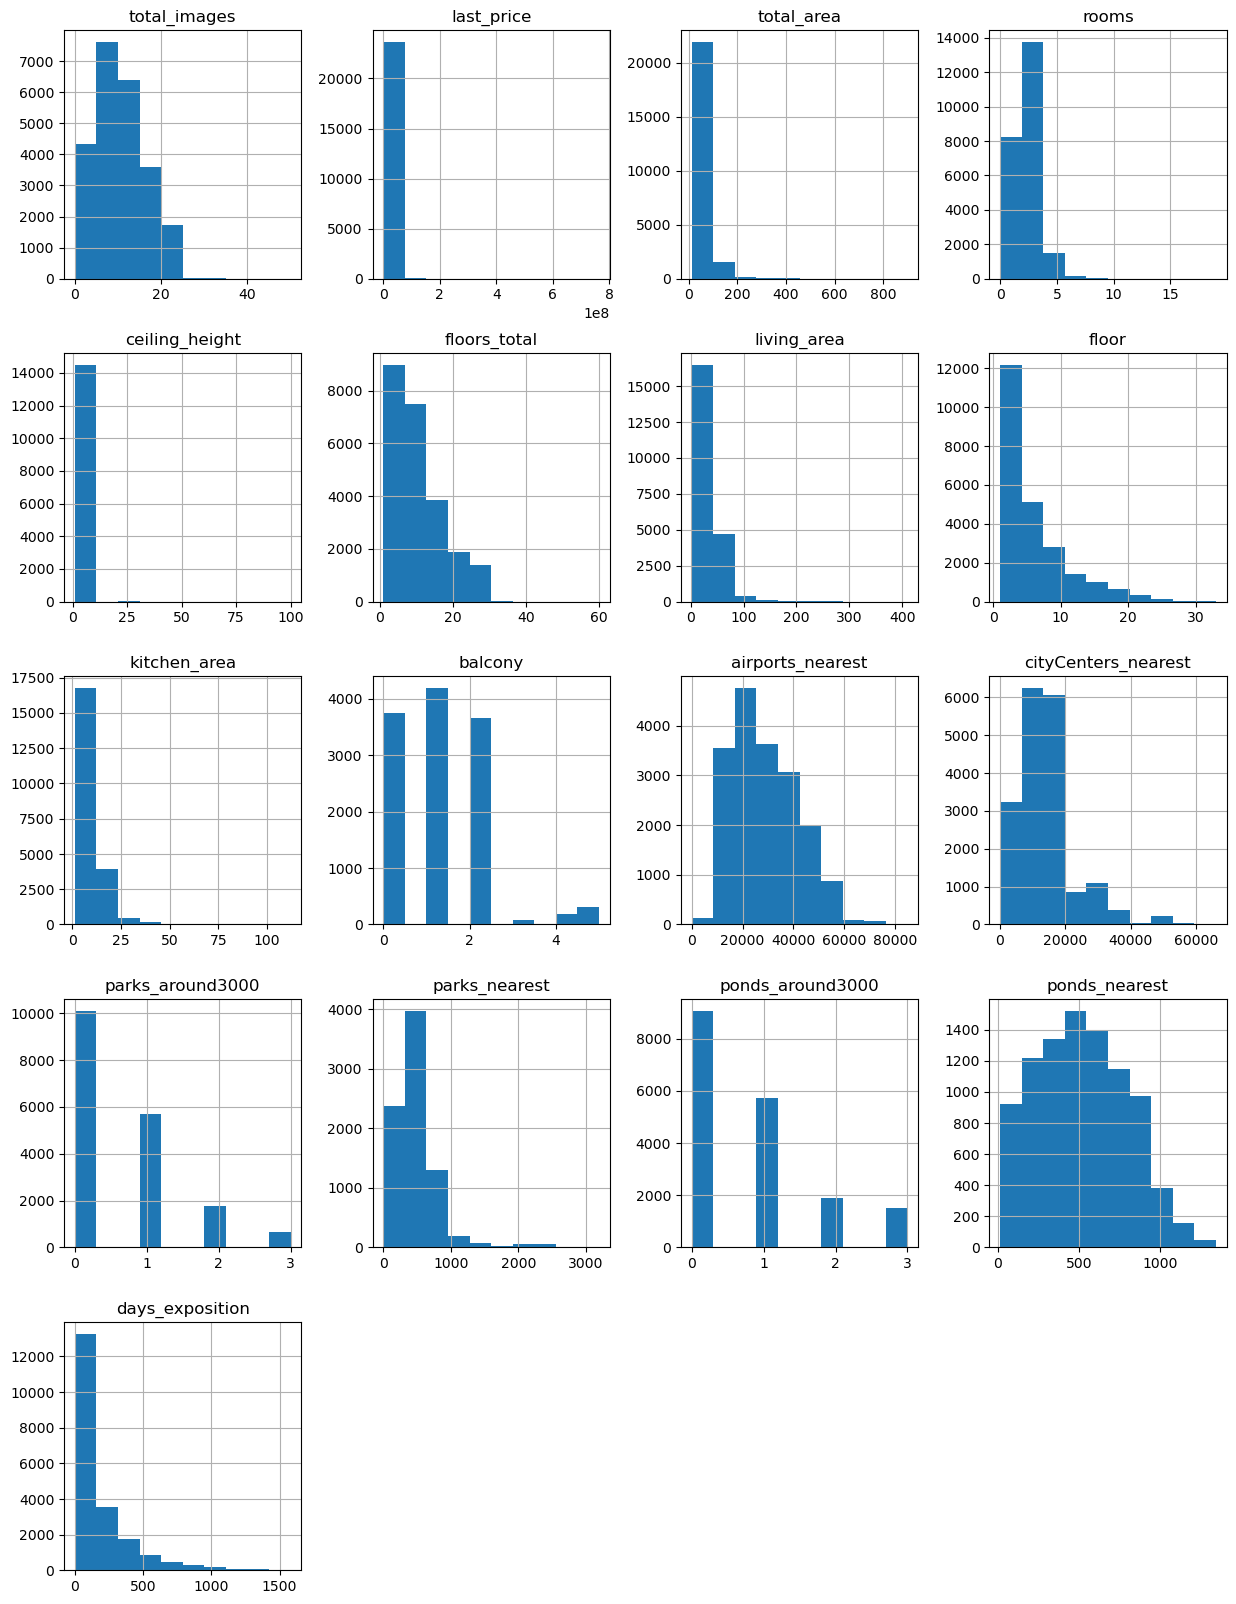

In [4]:
data.hist(figsize=(15, 20))
plt.show()

На основание данных таблица божно построить 17 гистограмм.

 - Согласно данным гистограммы «total_images» в верхнем левом углу можно говорить, что большинство объявлений содержит 5-10 и 10-15 фото квартир, а объявлений с количеством фотографий более 25 шт. практически нет.
 - Следующая гистограмма «last_price» показывает, что абсолютное большинство квартир продавалось по цене до 80 млн р. В данном виде гистограмма мало информативна, скорее всего, в данных присутствует информация об очень дорогой квартире, что и сдвигает большинство значений в первый столбец.
 - «total_area» показывает, что большинство квартир имеют площадь до 90 кв.м, немногие – до 180 кв.м, и лишь одиночные – площадью значительно больше.
 - «rooms» примерно 8000 объявлений о продаже 1,2 комнатных квартир, почти 14000 – о продаже 3-4 комнатных квартир. При количестве комнат 5 и более – объявлений в разы меньше.
 - «ceiling_height» - высота потолков – до 10м. Возможно в данных этого столбца выбросы или некорректные значения.
 - «floors_total» - большинство объявлений о продаже представлены в домах до 12 этажей. В высотках, этажностью свыше 20 этажей – объявлений значительно меньше. 
 - «living_area» - в большинстве объектов недвижимости жилая площадь не превышает 40 кв.м (это подтверждает, что в выборке большая часть квартир небольших размеров (как с общей, так и с жилой площадью)).
 - «floor» - 12000 квартир расположены на этажах не выше 4, еще около 5000 – с 4 по 8.
 - «kitchen_area» - площадь кухни в 16000 квартирах не превышает 10кв.м
 - «balcony» - в квартирах либо нет балконов, либо их 1-2 (что логично, в большинстве объявлений 1-2 комнатные квартиры).
 - «airports_nearest» - квартиры расположены неближе 9 км от аэропорта, большинство объектов недвижимости удалены от аэропорта на расстояние от 18км.
 - «cityCenters_nearest» - близко к центру города (до 7км) расположены 3500 квартир, основная масса квартир расположены в 7-20км от центра, и немногие – в пригородах.
 - «parks_around3000» - большинство квартир расположены вдали от парков. Лишь у 5700 квартир в пределах 3км будет парк.
 - «parks_nearest» - некоторые квартиры расположены у парков, либо в пределах 900м. Но количество объявлений, на основе которых построена гистограмма значительно меньше всего объема датафрейма.
 - «ponds_around3000» - большинство квартир расположены вдали от водоемов. Лишь у 5500 квартир в пределах 3км будет водоем.
 - «ponds_nearest» - некоторые квартиры расположены на берегу водоема, либо в пределах 900м. Но количество объявлений, на основе которых построена гистограмма значительно меньше всего объема датафрейма.
 - «days_exposition» - большинство объявлений было размещено на площадке не более 160 дней, но были и объявления, которые находились на площадке более 4 лет.


### 2. Предобработка данных

#### 2.1 Пропущенные значения

**общая информация о пропусках**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
#поиск пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# количество пропусков в % от общего числа записей
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [8]:
# изучим информацию о файле. Медианы, min и max значения. Они пригодятся в дальнейшем анализе.
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**rooms**

In [9]:
data[data['rooms'] == 0].shape[0]

197

В колонке rooms пропусков нет, но вызывает сомнение количество комнат, равное 0. Их 197 шт. Проверим, все ли они студии.

In [10]:
data[data['rooms'] == 0]['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

In [11]:
data[(data['rooms'] == 0)&(data['studio']==False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,NaN,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,NaN,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,NaN,...,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,NaN,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


In [12]:
#  по параметрам эти квартиры похожи на студии, применим к ним призник студии в столбце studio
data.loc[(data['rooms'] == 0), 'studio'] = True
# проверяем
data[(data['rooms'] == 0)&(data['studio']==False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**ceiling_height**

Колонка ceiling_height. В столбце 9195 пропущенных значений. Это 38,8% всех начений. 

Квартир, с высотой потолков менее 2м всего 3шт. Возможно, были технические ошибки при внесении данных в объявление. Заменим их на медианные.
А вот квартир с высотой потолков более 10м – 25шт. Особенно выделяется квартиры с потолками 25, 26, 27, 32 метра. Очень похоже на то, что в данных техническая ошибка – «съехала» запятая. 
Предлагаю заменить эти значения на 2.5, 2.6, 2.7, 3.2 метра соответственно.
Особняком стоит квартира с высотой потолков 100м. Это либо техническая ошибка, либо намеренное введение в заблуждение, либо фейковое объявление (к которому нет ни одного фото).
Эту строку удалим.
А нулевые значения и квартиры с высотой потолков 10-15 м заменим на медианные значения.

In [13]:
data[data['ceiling_height']<2.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [14]:
data[(data['ceiling_height']>10)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [15]:
# удаляем строку со значением 100м
data = data.loc[(data['ceiling_height'] != 100)]    

# заменяем пропущенные значения на медианные
height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value=height_median)

# корректируем значения с технической ошибкой
data.loc[(data['ceiling_height']>=20), 'ceiling_height'] = data.loc[(data['ceiling_height']>=20), 'ceiling_height'] / 10
data.loc[(data['ceiling_height']<2), 'ceiling_height'] = data['ceiling_height'].median()
data.loc[(data['ceiling_height']==14), 'ceiling_height'] = data['ceiling_height'].median()

# проверяем на нулевые значения
data['ceiling_height'].isna().sum()

0

**floors_total**

In [16]:
data['floors_total'].isna().sum()

86

Колонка floors_total содержит 86 нулевых значений. Скорее всего эти данные не были заполнены первоначально, возможно это поле было не обязательным, при подаче объявления. При этом известно, на каком этаже находится выставленная на продажу квартира.
Способы обработки:
- заменить этажность здания на этажность квартиры (но тогда все квартиры будут на последнем этаже, что может повлиять на дальнейший анализ);
- удалить значения (тем более что пропущенных значений всего 0,36% всей выборки);
- ничего не делать, если это не навредит исследованию (пока так и сделаем).

**living_area
kitchen_area**

In [17]:
data['living_area'].isna().sum()

1903

In [18]:
data['kitchen_area'].isna().sum()

2278

Колонки living_area и kitchen_area содержат 1903 и 2278 нулевых значений. Скорее всего эти данные не были заполнены первоначально, возможно это поле было не обязательным, при подаче объявления. 
Способы обработки:
- заменить нулевые значения на значение, равное проценту от площади квартиры (но квартиры все разные. Могут быть большие кухни и маленькие жилые комнаты, и наоборот. При такой замене может произойти подмена анализируемых значений. Так делать не жулательно);
- удалить значения (но пропущенных значений 8% (9,6%), что является уже значительным количеством информации);
- ничего не делать, если это не навредит исследованию (пока так и сделаем).

**studio и open_plan**

Колонки studio и open_plan не имеют пропусков и содержат булеве значения (да-нет). На данный момент их предобработка не требуется.

**balcony**

In [19]:
data['balcony'].isna().sum()

11519

In [20]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     303
4.0     183
3.0      81
Name: balcony, dtype: int64

В колонке balcony содержится 11519 пропусков, что составляет почти половину всех значений (48,8%) столбца.
Логично предположить, что пользователи не заполняли данные о балконах, когда их в квартире нет. Заменим отсутствующие значения на 0.

In [21]:
data['balcony'] = data['balcony'].fillna(0)

**locality_name**

In [22]:
data['locality_name'].isna().sum()

49

В столбце locality_name пропусков не много, всего 0,2% от общего числа значений. Название населенного пункта, где расположен объект недвижимости важно для анализа, поэтому удалим некорректные значения.

In [23]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

**airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition**

Колонки airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest содержат пропущенные значения. Но для их корректной обработки нужны точные географические координаты объектов, чего у меня в распоряжении нет, поэтому оставим значения без изменений.
Причины появления пропусков:
- технические (некорректная выгрузка);
- данные не заполнены первоначально;
- не указаны географические координаты;
- объявления размещены давно и не корректировались после обновления программы.

В колонке days_exposition находятся как новые, так и старые объявления (закрытые и действующие). Обработка такой информации не требуется.

**is_apartment**

In [24]:
data['is_apartment'].isna().sum()

20890

In [25]:
data['is_apartment'].value_counts()

False    2710
True       49
Name: is_apartment, dtype: int64

В столбце is_apartment больше всего пропусков - 20924. А из заполненных лишь 49 объектов недвижимости - аппартаменты. Считаю, что наличие пропусков связано с тем, что продавцы не указывали данный параметр при подаче объявлений и большинство объектов в продаже все-таки квартиры. Также, возможно, представленная выгрузка содержит устаревшую информацию, и строительство аппартаментов было еще не так популярно, как в настоящее время. С этими значениями ничего делать пока не будем, возможно они и не пригодятся, для дальнейшего анализа.

#### 2.2 Обработка типов данных

Для удобства работы приведем данные из last_price, floor и balcony к целочисленным значениям, а данные из first_day_exposition к формату даты. Т.к.в колонке first_day_exposition есть данные только о дне, месяце и годе, то и приведем к подобному форматы (упустим время).

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23649 entries, 0 to 23648
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23649 non-null  int64  
 1   last_price            23649 non-null  float64
 2   total_area            23649 non-null  float64
 3   first_day_exposition  23649 non-null  object 
 4   rooms                 23649 non-null  int64  
 5   ceiling_height        23649 non-null  float64
 6   floors_total          23564 non-null  float64
 7   living_area           21751 non-null  float64
 8   floor                 23649 non-null  int64  
 9   is_apartment          2759 non-null   object 
 10  studio                23649 non-null  bool   
 11  open_plan             23649 non-null  bool   
 12  kitchen_area          21380 non-null  float64
 13  balcony               23649 non-null  float64
 14  locality_name         23649 non-null  object 
 15  airports_nearest   

In [27]:
data['last_price'] = data['last_price'].astype('int')
data['floor'] = data['floor'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data[data['floors_total'].notnull()]['floors_total'].astype('int')
data['days_exposition'] = data[data['days_exposition'].notnull()]['days_exposition'].astype('int')


In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')

#### 2.3 Устранение дубликатов

In [29]:
# поиск явных дубликатов
data.duplicated().sum()

0

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [31]:
data['locality_name'].value_counts()

Санкт-Петербург                    15720
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

В столбце locality_name на данном этапе 364 уникальных названия поселений. Среди них есть неявные дубликаты, например "поселок" и "посёлок", "поселок городского типа" и просто "поселок" с одинаковыми названиями местности.  Видимо люди заполняли эти данные вручную и называли местности по-разному. Можно было бы привести все "виды" поселков (ПГТ, коттетжные) к одному: поселок (деревня), но встречаются и такие дубликаты, как "посёлок Мурино" - "поселок Мурино" - "Мурино". Поэтому уберем признак: поселок, село, деревня, оставим только наименование, но запишем данные в отдельный столбец.

In [32]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')
data.insert(15, "new_locality_name", data['locality_name'])
data['new_locality_name'] = (
    data['new_locality_name'].str.replace('поселок при железнодорожной станции ', '')
    .str.replace('коттеджный поселок ', '')
    .str.replace('поселок городского типа ', '')
    .str.replace('городской поселок ', '')
    .str.replace('поселок станции ', '')
    .str.replace('садоводческое некоммерческое товарищество ', '')
    .str.replace('поселок ', '')
    .str.replace('деревня ', '')
    .str.replace('садоводческое товарищество ', '')
    .str.replace('село ', '')
)


In [33]:
data['new_locality_name'].value_counts()

санкт-петербург    15720
мурино               590
кудрово              472
шушары               440
всеволожск           398
                   ...  
котлы                  1
алексеевка             1
белоостров             1
петро-славянка         1
дзержинского           1
Name: new_locality_name, Length: 307, dtype: int64

#### 2.4 Вывод
В ходе преодобрабоки данных:

- выявлены пропуски в колонках. В некоторых колонках количество пропусков достигало половины всех значений. ( Я связываю наличие пропусков в данных с тем, что пользователи, заполняющие строки не посчитали нужным внести эти данные в карточку объектов. а также не у всех объектов были географические координаты, соответственно информация о парках и водных объектах не доступна. )
- проанализированны пропущенные значения и, в зависимости от целесообразности, заполнены.
- изменен тип данных в некоторых из колонок, для удобства последующей работы с данными.
- обработаны дубликаты в названиях населенных пунктов.
- устранены аномальные значения.


### 3. Посчитайте и добавьте в таблицу новые столбцы

In [34]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,new_locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,0,санкт-петербург,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,2,поселок шушары,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,0,санкт-петербург,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,0,санкт-петербург,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,0,санкт-петербург,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [35]:
# создадим колонку с ценой за кв.м, округлим значения до сотых (копеек)
data['price_m2'] = round(data['last_price'] / data['total_area'], 2)
data['price_m2'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_m2, dtype: float64

In [36]:
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

In [37]:
# месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month
data['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

In [38]:
# год публикации объявления
data['year'] = data['first_day_exposition'].dt.year
data['year'].head()


0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

In [39]:
# тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(floor_category, axis = 1) 
data['floor_category'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_category, dtype: object

In [40]:
# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
data['cityCenters_km'] = round(data['cityCenters_nearest'] / 1000)

data['cityCenters_km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenters_km, dtype: float64

### 4. Проведите исследовательский анализ данных

#### 4.1 Изучим параметры объектов.
##### 4.1.1 **Общая площадь**

<function matplotlib.pyplot.show(close=None, block=None)>

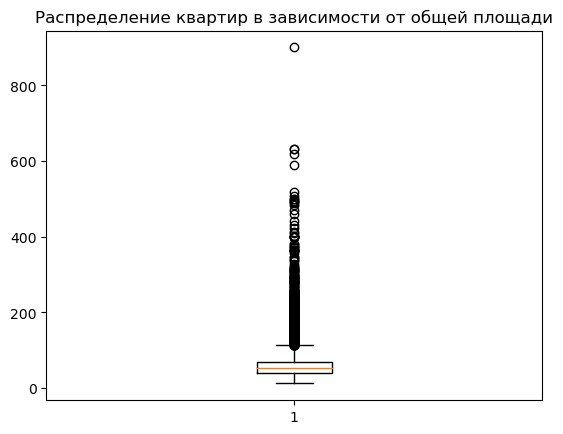

In [41]:
plt.boxplot(data['total_area'])
plt.title('Распределение квартир в зависимости от общей площади')
plt.show

In [42]:
data['total_area'].describe()

count    23649.000000
mean        60.330563
std         35.661822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [43]:
len(data.query('total_area>200'))

227

Площадь всех объектов недвижимости находится в пределах от 12кв.м до 900кв.м. Но медианным значением является площадь в 52кв.м, средним - 60кв.м. Квартир, площадью более 200 кв.м лишь 227шт.

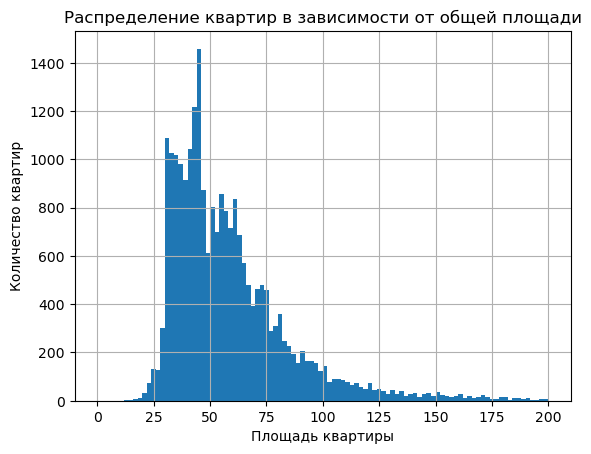

In [44]:
data['total_area'].hist(bins=100, range=(0, 200))
plt.title('Распределение квартир в зависимости от общей площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

Пик гистограммы приходится на площадь квартир 44-45кв.м, основная масса объектов недвижимости, которые были доступны для продажи в Санкт-Петербурге и области имели площадь 30-60кв.м Квартир, площадью 86-110кв.м значительно меньше. Объектов недвижимости с площадью более 125кв.м. - единичные объявления.

##### 4.1.2  **жилая площадь**

<function matplotlib.pyplot.show(close=None, block=None)>

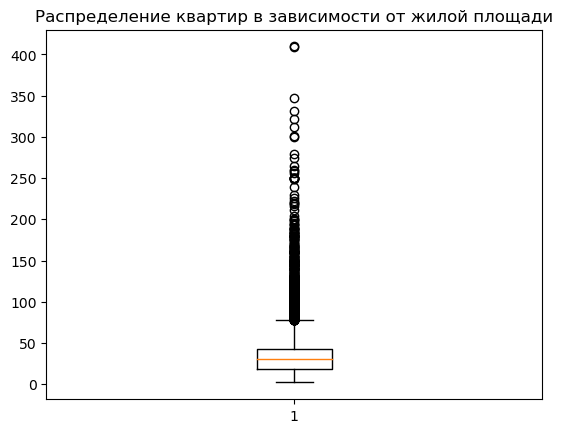

In [45]:
plt.boxplot(data['living_area'].dropna())
plt.title('Распределение квартир в зависимости от жилой площади')
plt.show

In [46]:
data['living_area'].describe()

count    21751.000000
mean        34.449296
std         22.037735
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Жилая площадь всех объектов недвижимости находится в пределах от 2кв.м до 409кв.м. Но медианным значением является площадь в 30кв.м, средним - 34кв.м. Квартир, с жилой площадью более 100 кв.м незначительное количество.

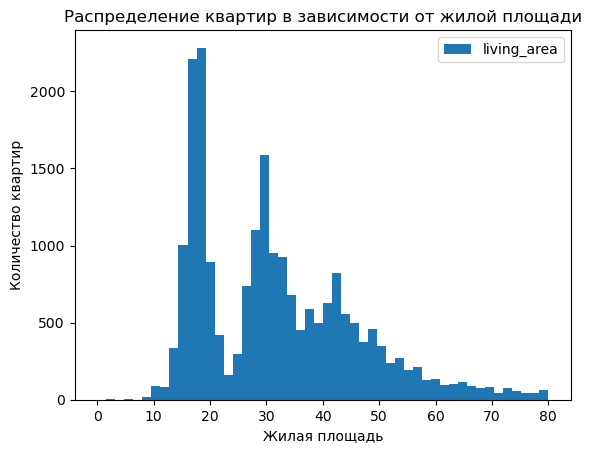

In [47]:
data.plot(
    kind='hist',
    y='living_area',
    range=(0, 80),
    bins=50,
    title='Распределение квартир в зависимости от жилой площади',
)
plt.xlabel('Жилая площадь')
plt.ylabel('Количество квартир')
plt.show()


На гистограмме отчетливо видны 3 пика: 
- 15-18кв.м, что может соответствовать жилой площади 1-комнатной квартиры.
- 29-32кв.м, что может соответствовать жилой площади 2-комнатной квартиры.
- 44-46кв.м, что может соответствовать жилой площади 3-комнатной квартиры.

##### 4.1.3 **площадь кухни**

<function matplotlib.pyplot.show(close=None, block=None)>

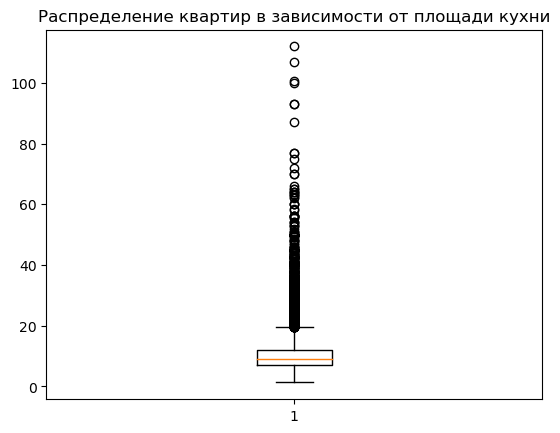

In [48]:
plt.boxplot(data['kitchen_area'].dropna())
plt.title('Распределение квартир в зависимости от площади кухни')
plt.show

In [49]:
data['kitchen_area'].describe()

count    21380.000000
mean        10.566383
std          5.901890
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

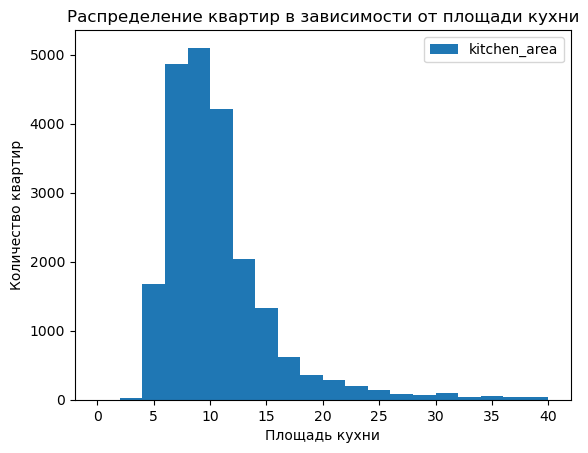

In [50]:
data.plot(
    kind='hist',
    y='kitchen_area',
    range=(0, 40),
    bins=20,
    title='Распределение квартир в зависимости от площади кухни',
)
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

Площадь кухни объектов недвижимости Санкт-Петербурга находится в пределах от 1.3кв.м до 112кв.м. Медианным значением является площадь в 9.1кв.м, средним - 10.5кв.м.
Площадь кухни большинства объектов недвижимости находится в пределах от 7-12кв.м, о чем свидетельствует пик гистограммы. Квартир, с площадью кухни более 20 кв.м незначительное количество.

##### 4.1.4 **цена объекта**

<function matplotlib.pyplot.show(close=None, block=None)>

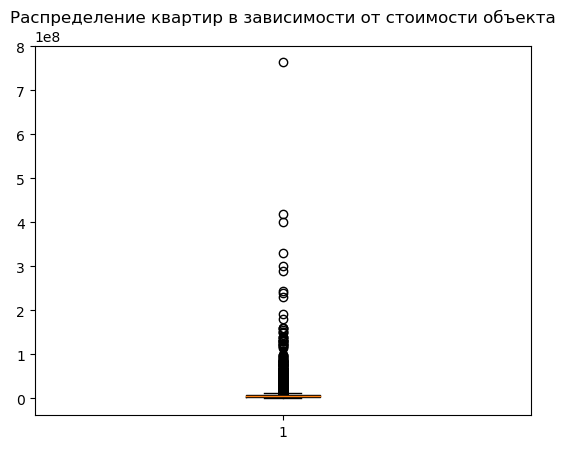

In [51]:
plt.boxplot(data['last_price'].dropna())
plt.title('Распределение квартир в зависимости от стоимости объекта')
plt.show

In [52]:
data['last_price'].describe()

count    2.364900e+04
mean     6.540769e+06
std      1.089649e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

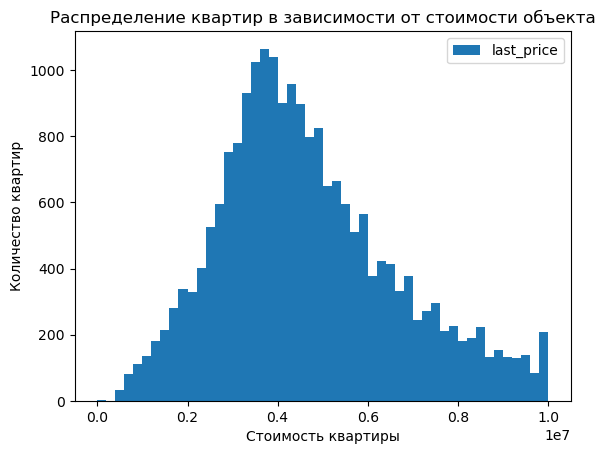

In [53]:
data.plot(
    kind='hist',
    y='last_price',
    range=(0, 10000000),
    bins=50,
    title='Распределение квартир в зависимости от стоимости объекта',
)
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество квартир')
plt.show()

Стоимость объектов недвижимости Санкт-Петербурга неоднородна и имеет широкий размах. Квартиры в городе стоят от 12190 до 763 000 000. Но медианным значением 4 650 000 ден.ед., средним - 6 540 769ден.ед. 
Большое кол-во объектов недвижимости продается за семму 3-5млн.ден.ед., о чем свидетельствует пик на гистограмме.

##### 4.1.5 **количество комнат**

In [54]:
data['rooms'].describe()

count    23649.000000
mean         2.070151
std          1.078621
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

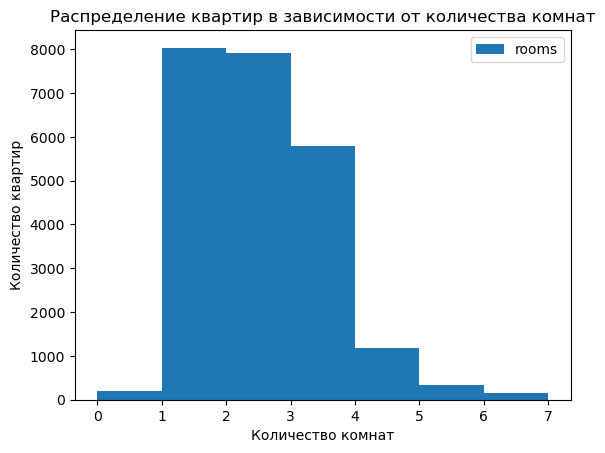

In [55]:
data.plot(
    kind='hist',
    y='rooms',
    range=(0, 7),
    bins=7,
    title ='Распределение квартир в зависимости от количества комнат',
)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Объекты недвижимости Санкт-Петербурга представлены 1, 2, 3-комнатными квартирами. Конечно, также есть и студии и квартиры более 5 комнат, и даже в 19 комнат, но их количество в общей массе незначительно.

##### 4.1.6 **высота потолков**

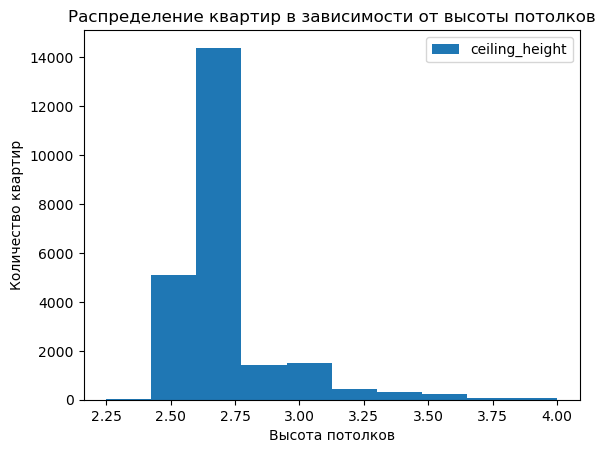

In [56]:
data.plot(
    kind='hist',
    y='ceiling_height',
    range=(2.25, 4),
    bins=10,
    title ='Распределение квартир в зависимости от высоты потолков',
)
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

In [57]:
data['ceiling_height'].describe()

count    23649.000000
mean         2.698000
std          0.237072
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

Высота потолков в квартирах достаточно однородна и колеблется в рамках 2,5-2,75м. Скорее всего, это обусловлено типовой застройкой.

##### 4.1.7 **этаж квартиры**

In [58]:
data['floor'].describe()

count    23649.000000
mean         5.893315
std          4.883417
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

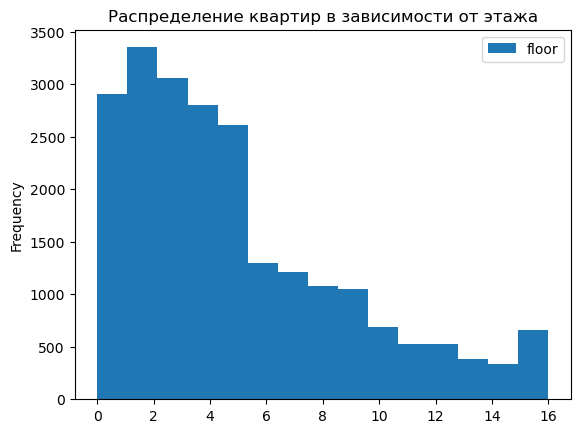

In [59]:
data.plot(
    kind='hist',
    y='floor',
    range=(0, 16),
    bins=15,
    title ='Распределение квартир в зависимости от этажа',
)
plt.show()

Большинство квартир в Санкт-Петербурге и области продается в пятиэтажках. Квартир, расположенных на этажах, выше 15 незначительное количество.

Это может быть связано с особенностью застройки города и большим количеством старого жилого фонда. Высотки-новостройки начали строить в городе сравнительно недавно, вот и предложений меньше.

##### 4.1.8 **тип этажа квартиры («первый», «последний», «другой»)**

In [60]:
print(data['floor_category'].describe())
floor_value_counts= data['floor_category'].value_counts()
floor_value_counts

count      23649
unique         3
top       другой
freq       17408
Name: floor_category, dtype: object


другой       17408
последний     3329
первый        2912
Name: floor_category, dtype: int64

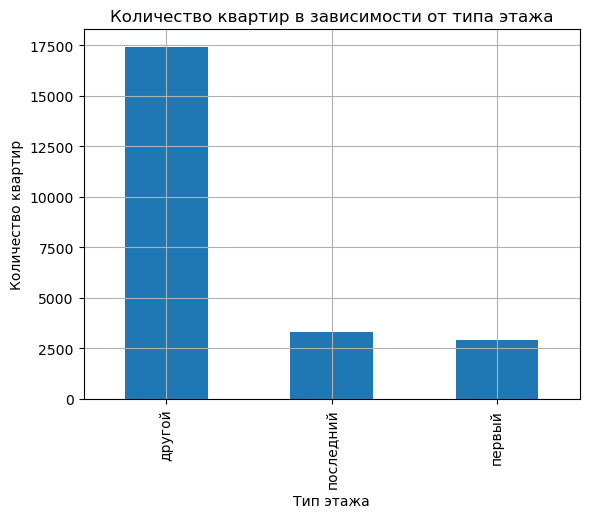

In [61]:
floor_value_counts.plot(kind='bar', grid = True, title = 'Количество квартир в зависимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир в Санкт-Петербурге и области продается не на крайних этажах. 
На 1 этажах расположены 2912 квартиры, на последнем 3329 квартиры, остальные 17408 на остальных.

##### 4.1.9 **общее количество этажей в доме**

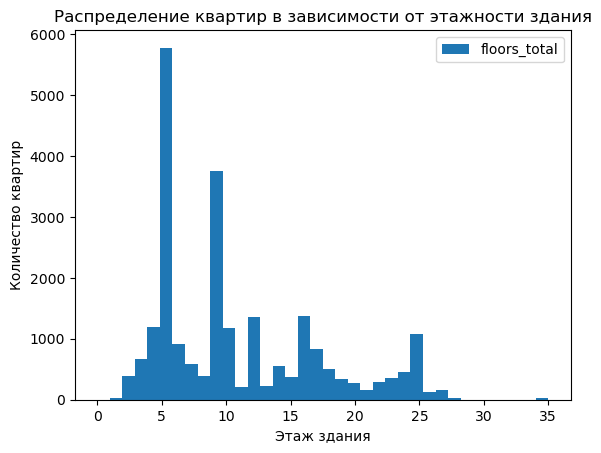

In [62]:
data.plot(
    kind='hist',
    y='floors_total',
    range=(0, 35),
    bins=36,
    title ='Распределение квартир в зависимости от этажности здания',
)
plt.xlabel('Этаж здания')
plt.ylabel('Количество квартир')
plt.show()

In [63]:
data['floors_total'].describe()


count    23564.000000
mean        10.676116
std          6.594860
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

В Санкт-Петербурге есть как одноэтажные здания, так и высотки в 60 этажей. Медианное значение этажности зданий - 9 этажей, среднее - 10.
По гистограмме мы можем судить о типичной застройке. Преобладают 5-ти, 9-ти этажные здания, также часто встречается застройка в  12, 16 и 24 этажа. Домов выше 25 этажей в регионе совсем мало.

##### 4.1.10 **расстояние до центра города в метрах**

count    18138.000000
mean     14198.186845
std       8606.955501
min        181.000000
25%       9241.000000
50%      13106.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


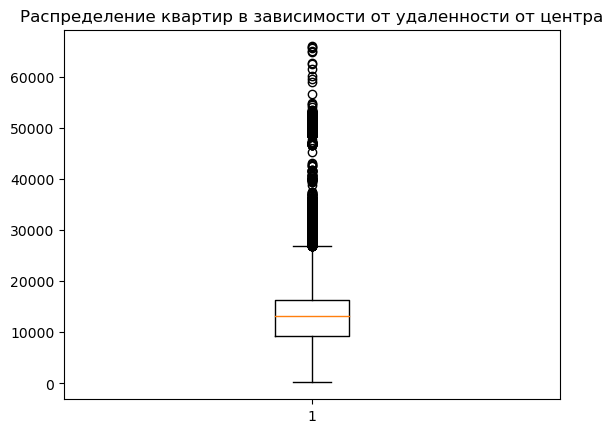

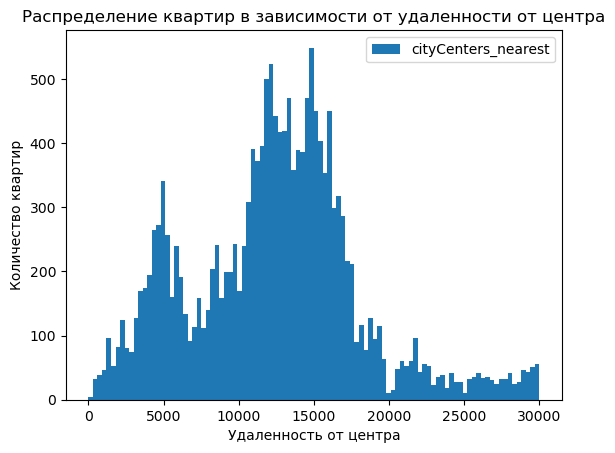

In [64]:
plt.boxplot(data['cityCenters_nearest'].dropna())
plt.title('Распределение квартир в зависимости от удаленности от центра')
plt.show

data.plot(
    kind='hist',
    y='cityCenters_nearest',
    range=(0, 30000),
    bins=100,
    title ='Распределение квартир в зависимости от удаленности от центра',
)
plt.xlabel('Удаленность от центра')
plt.ylabel('Количество квартир')

print(data['cityCenters_nearest'].describe())

В среднем, недвижимость находится на расстоянии 14 км от центра города. Конечно, можно найти квартиру и в 181м от Дворцовой площади, но большинство квартир, все-таки расположены на 11-16км отдалении от нее.
Далее 20 км от центра города количество предложений резко падает. Либо это уже пригород, либо начинающиеся застраиваться новые районы города.

##### 4.1.11 **расстояние до ближайшего аэропорта**

count    18115.000000
mean     28802.885840
std      12637.580088
min          0.000000
25%      18575.500000
50%      26756.000000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64


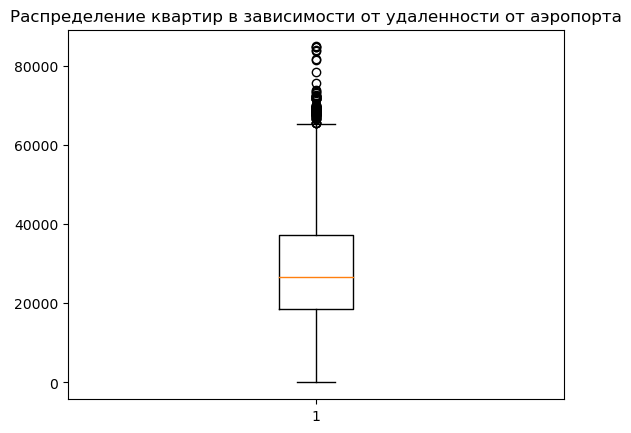

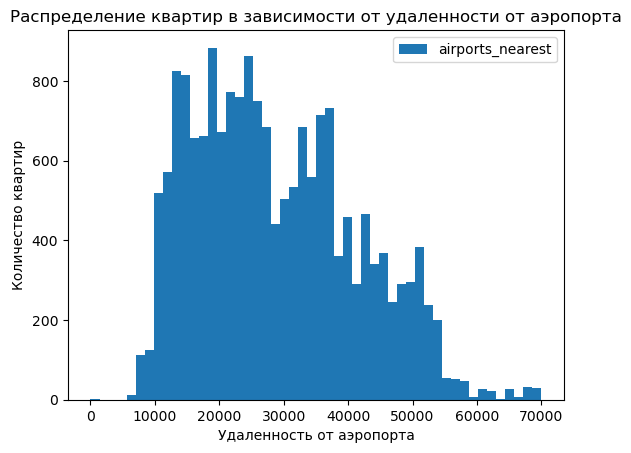

In [65]:
plt.boxplot(data['airports_nearest'].dropna())
plt.title('Распределение квартир в зависимости от удаленности от аэропорта')
plt.show

data.plot(
    kind='hist',
    y='airports_nearest',
    range=(0, 70000),
    bins=50,
    title ='Распределение квартир в зависимости от удаленности от аэропорта',
)
plt.xlabel('Удаленность от аэропорта')
plt.ylabel('Количество квартир')

print(data['airports_nearest'].describe())

Аэропорт Пулково расположен на юге города и добираться до него прийдется не менее 10 км. Основная масса недвижимости сосредоточена в пределах 18-37 км от аэропорта.

##### 4.1.12 **расстояние до ближайшего парка**

count    8063.000000
mean      490.863946
std       342.562642
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


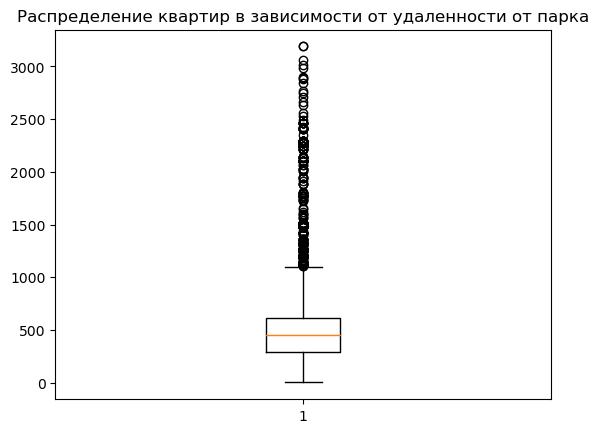

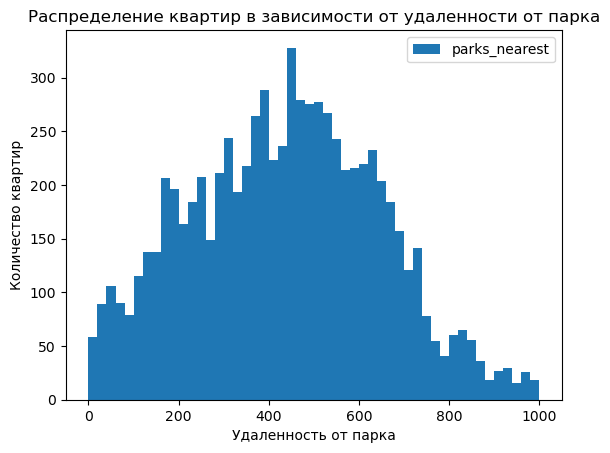

In [66]:
plt.boxplot(data['parks_nearest'].dropna())
plt.title('Распределение квартир в зависимости от удаленности от парка')
plt.show

data.plot(
    kind='hist',
    y='parks_nearest',
    range=(0, 1000),
    bins=50,
    title ='Распределение квартир в зависимости от удаленности от парка',
)
plt.xlabel('Удаленность от парка')
plt.ylabel('Количество квартир')

print(data['parks_nearest'].describe())

Санкт-Петербург очень зеленый город. Там создано 68 парков, 166 садов, 730 скверов. Есть в городе недвижимость прямо у парка, но и с большой вероятростью не прийдется идти до ближайшего парка более 700м. (Среднее расстояние от объекта недвижимости до парка - 490м, медианное - 455м.

##### 4.1.13 **день и месяц публикации объявления**

count    23649.000000
mean         6.401539
std          3.491490
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


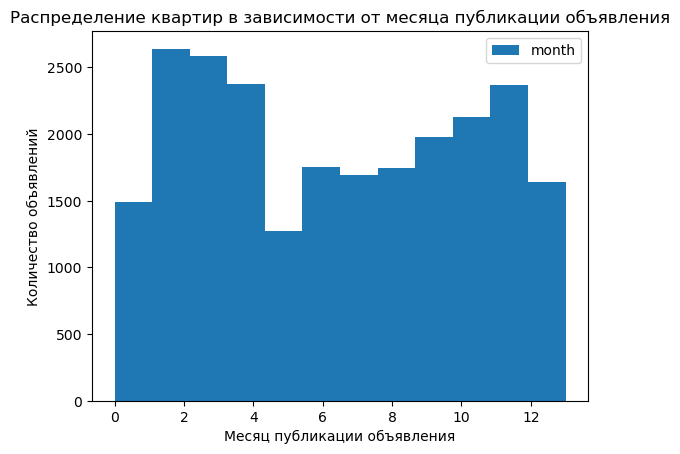

In [67]:
data.plot(
    kind='hist',
    y='month',
    range=(0, 13),
    bins=12,
    title ='Распределение квартир в зависимости от месяца публикации объявления',
)
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество объявлений') 

print(data['month'].describe())

Из гистограммы видно, что пик активности рынка приходится на февраль-март-апрель. В эти месяцы выставленно больше всего объектов недвижимости на продаже. В мае - резкое падение и постепеннное отрастание к январю.

count    23649.000000
mean         2.568734
std          1.788842
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


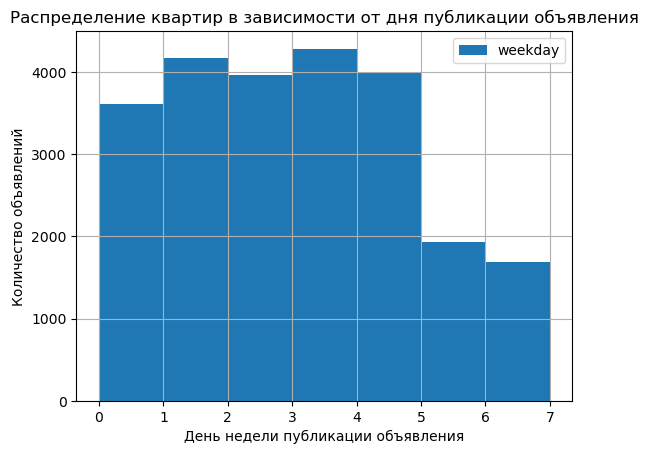

In [68]:
data.plot(
    kind='hist',
    y='weekday',
    range=(0, 7),
    bins=7,
    grid=True,
    title ='Распределение квартир в зависимости от дня публикации объявления',
)
plt.xlabel('День недели публикации объявления')
plt.ylabel('Количество объявлений') 

print(data['weekday'].describe())

В понедельник-пятницу, т.е. в течение рабочей недели публикуется большинство объявлений. чуть меньше в понедельник. С началом выходных, т.е. в субботу и воскресенье, количество размещенных на площадке объявлений резко снижается и не превышает 2000 за день за один из дней за весь период наблюдений. видимо, большинство риэлторов в выходные отдыхают.

#### 4.2 **Как быстро продавались квартиры**

In [69]:
data['days_exposition'].describe()

count    20469.000000
mean       180.761102
std        219.780376
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

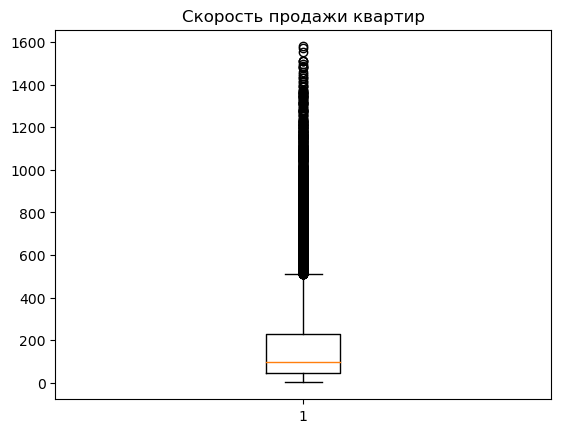

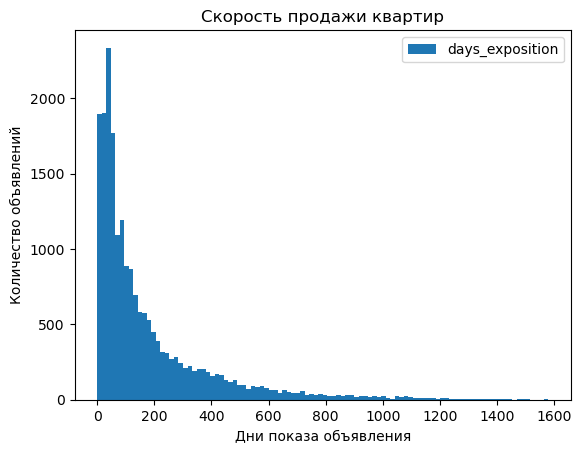

In [70]:
plt.boxplot(data['days_exposition'].dropna())
plt.title('Скорость продажи квартир')
plt.show

data.plot(
    kind='hist',
    y='days_exposition',
    range=(0, 1580),
    bins=100,
    title ='Скорость продажи квартир',
)
plt.xlabel('Дни показа объявления')
plt.ylabel('Количество объявлений') 

plt.show()

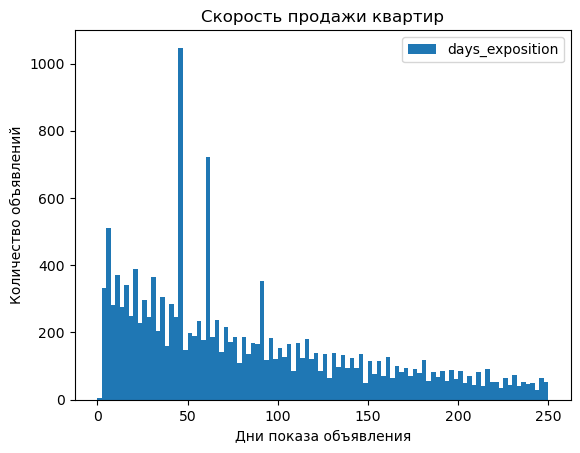

In [71]:
data.plot(
    kind='hist',
    y='days_exposition',
    range=(0, 250),
    bins=100,
    title ='Скорость продажи квартир',
)
plt.xlabel('Дни показа объявления')
plt.ylabel('Количество объявлений') 
plt.show()

Из представленных выше расчетов и визуализаций видно, что квартиры в среднем продавались за 180 дней, хотя медианное значение 95 дней. большинство квартир продается в промежутке 45-231 день. Можно сказать, что это обычное время продажи.

Если квартира до 45 дней - это можно назать быстрой продажей. Те квартиры, которые продаются более 500 дней - аномально долгие продажи. 

На гистограмме четко видно 3 пика: 45 дней, 60 и 90 дней. Скорее всего - это автоматическое снятие объявления с публикации, но и недвижимость к этому моменту может быть продана. Эти данные требуют уточнения (автоматическое снятие объявления или пользоательское).

#### 4.3 **Какие факторы больше всего влияют на стоимость объекта**

In [72]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.653797,0.566569,0.520239,0.363465
total_area,0.653797,1.000000,0.939532,0.608897,0.758735
living_area,0.566569,0.939532,1.000000,0.428786,0.846081
kitchen_area,0.520239,0.608897,0.428786,1.000000,0.270595
rooms,0.363465,0.758735,0.846081,0.270595,1.000000


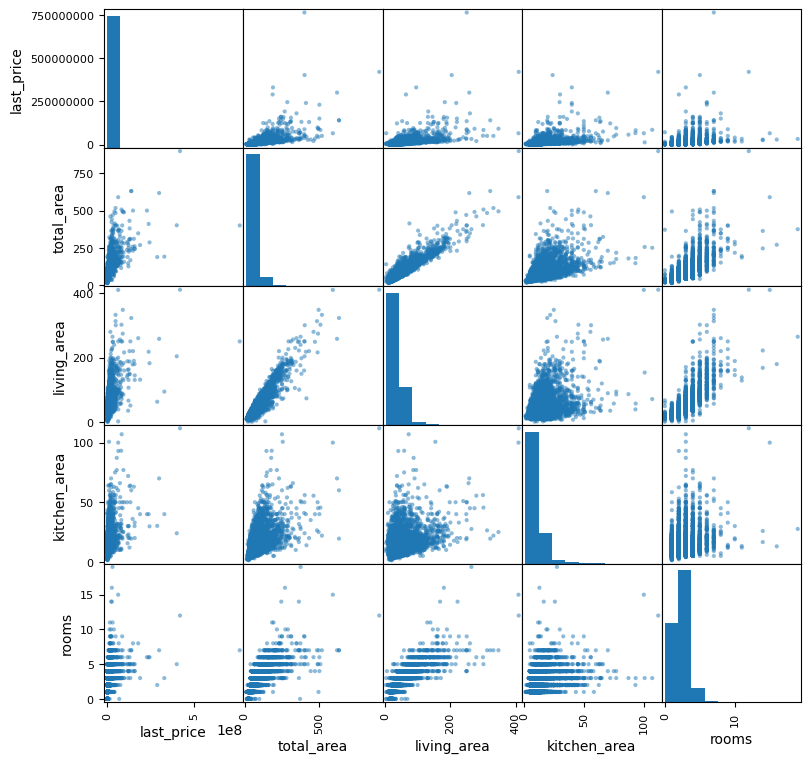

In [73]:
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']], figsize=(9, 9))
plt.show()

#### 4.3.1 **общая площадь**

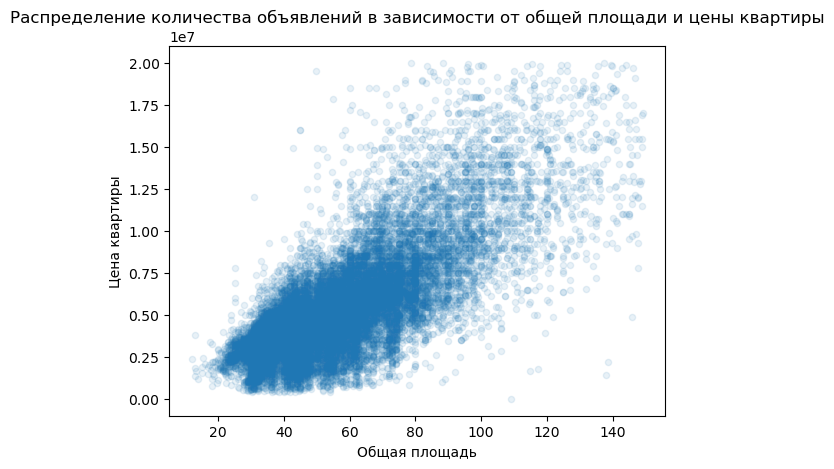

0.6537973150529148


In [74]:
data[(data['total_area']<150)&(data['last_price']<20000000)].plot(x='total_area', y='last_price', kind='scatter', alpha=0.1) 
plt.title('Распределение количества объявлений в зависимости от общей площади и цены квартиры')
plt.xlabel('Общая площадь')
plt.ylabel('Цена квартиры') 
plt.show()

print(data['total_area'].corr(data['last_price']))

В ходе исследования было уже выяснено, что квартиры в Санкт-Петербурге и Ленинградской области разнородны и имеют большой размах как по площади, так и по стоимости. Поэтому для построения диаграммы рассеяния будем использовать срез данных.

На диаграмме четко выделяется основная масса точек с наиболее частыми сочетаниями стоимости и площади. При этом с увеличением площади увеличивается и стоимость недвижимости. Можно найти и уникальные примеры объектов недвижимости с площадью более 100кв.м и стоимостью менее 2млн. 

Коэффициент корреляции Пирсона подтверждает, что связь между анализируемыми показателями прямая и устойчивая.

#### 4.3.2 **жилая площадь**

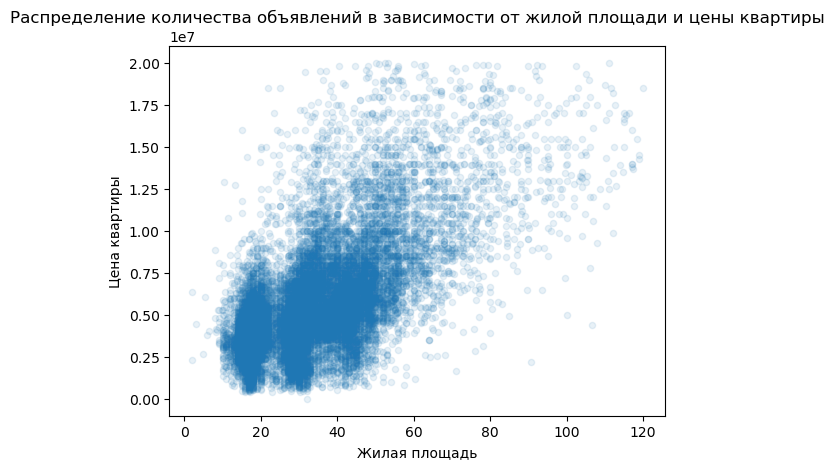

0.5665693870066872


In [75]:
data[(data['living_area']<120)&(data['last_price']<20000000)].plot(x='living_area', y='last_price', kind='scatter', alpha=0.1) 
plt.title('Распределение количества объявлений в зависимости от жилой площади и цены квартиры')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена квартиры') 
plt.show()

print(data['living_area'].corr(data['last_price']))

С увеличением жилой площади увеличивается и стоимость недвижимости. 

Коэффициент корреляции Пирсона подтверждает, что связь между анализируемыми показателями прямая и устойчивая, и также достаточно сильная.

#### 4.3.3 **площадь кухни**

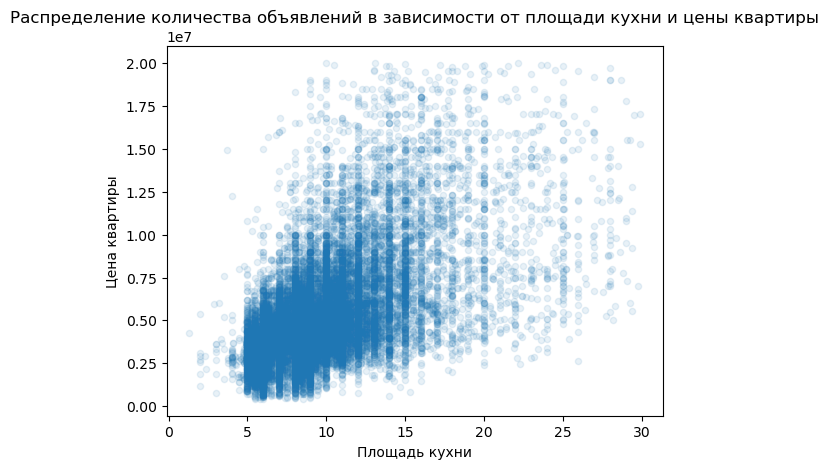

0.5202393109043166


In [76]:
data[(data['kitchen_area']<30)&(data['last_price']<20000000)].plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1) 
plt.title('Распределение количества объявлений в зависимости от площади кухни и цены квартиры')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры') 
plt.show()

print(data['kitchen_area'].corr(data['last_price']))

С увеличением площади кухни увеличивается и стоимость недвижимости. 

Коэффициент корреляции Пирсона подтверждает, что связь между анализируемыми показателями прямая и устойчивая, и также достаточно сильная.

#### 4.3.4 **количество комнат**

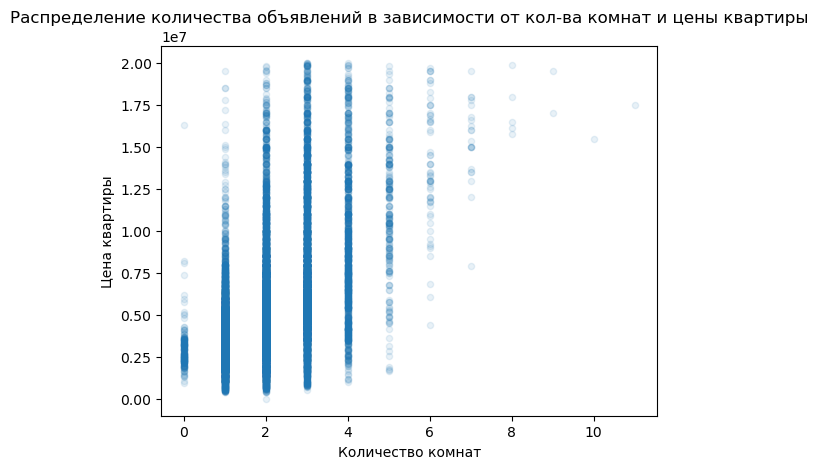

0.3634653856544925


In [77]:
data[(data['last_price']<20000000)].plot(x='rooms', y='last_price', kind='scatter', alpha=0.1) 
plt.title('Распределение количества объявлений в зависимости от кол-ва комнат и цены квартиры')
plt.xlabel('Количество комнат')
plt.ylabel('Цена квартиры') 
plt.show()

print(data['rooms'].corr(data['last_price']))

С увеличением количества комнат увеличивается и стоимость недвижимости. 
Данные о количестве комнат категориальные и диаграмма не такая информативная, но возрастающую линию тренда можно построить по области с наибольшим скоплениям точек.

Коэффициент корреляции Пирсона подтверждает, что связь между анализируемыми показателями есть, но она не так сильна, как между стоимостью и площадью. 

#### 4.3.5 **дата размещения**

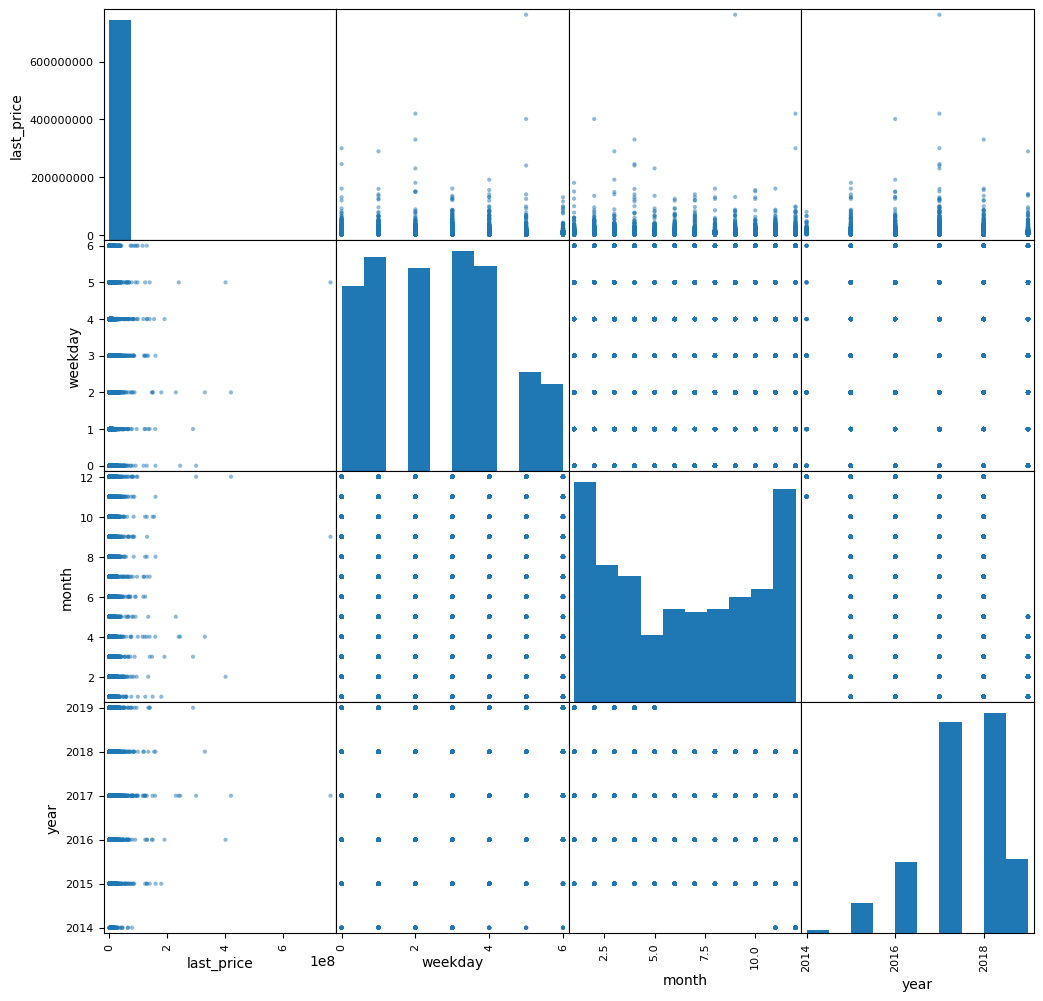

In [78]:
pd.plotting.scatter_matrix(data[['last_price', 'weekday', 'month', 'year']], figsize=(12, 12))
plt.show()

In [79]:
data[['last_price', 'weekday', 'month', 'year']].corr()

,last_price,weekday,month,year
last_price,1.000000,0.001617,0.002735,-0.042948
weekday,0.001617,1.000000,0.011356,-0.003836
month,0.002735,0.011356,1.000000,-0.271182
year,-0.042948,-0.003836,-0.271182,1.000000


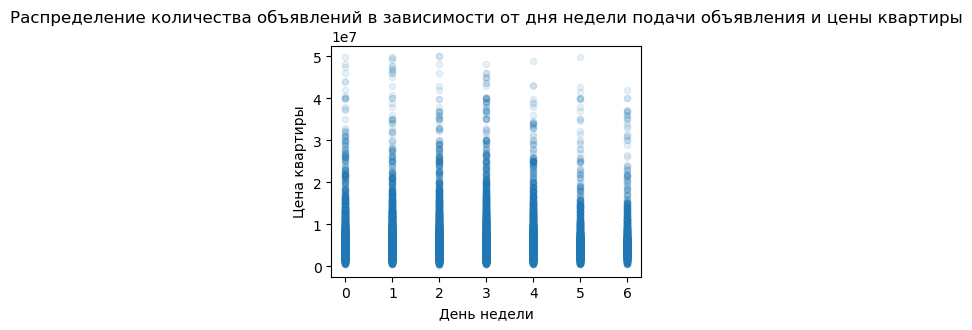

In [80]:
data[(data['last_price']<50000000)].plot(x='weekday', y='last_price', kind='scatter', alpha=0.1, figsize=(4, 3)) 
plt.title('Распределение количества объявлений в зависимости от дня недели подачи объявления и цены квартиры')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры') 
plt.show()

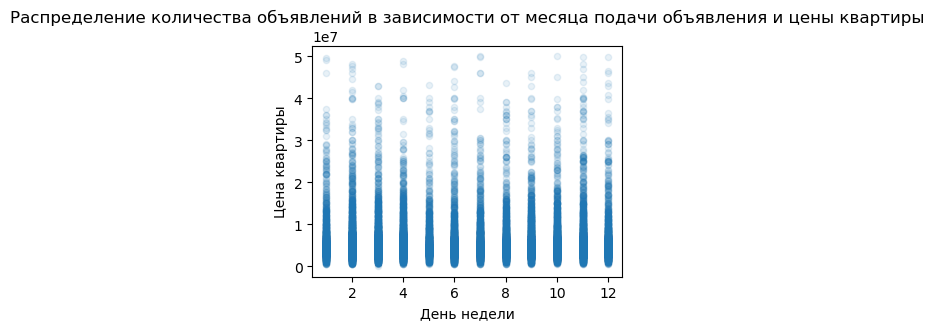

In [81]:
data[(data['last_price']<50000000)].plot(x='month', y='last_price', kind='scatter', alpha=0.1, figsize=(4, 3)) 
plt.title('Распределение количества объявлений в зависимости от месяца подачи объявления и цены квартиры')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры') 
plt.show()

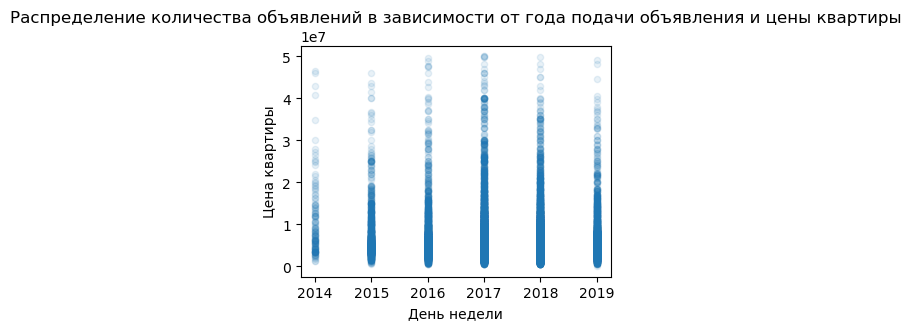

In [82]:
data[(data['last_price']<50000000)].plot(x='year', y='last_price', kind='scatter', alpha=0.1, figsize=(4, 3)) 
plt.title('Распределение количества объявлений в зависимости от года подачи объявления и цены квартиры')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры') 
plt.show()

Значения дня недели, месяца и года можно отнести к категориальным данным. Визуализация посредством диаграммы рассеяния не очень информативна. Линию тренда (восходящую или нисходящую) провести не удается. Проанализируем эти данные с помощью коэффициента корреляции. Коэффициент близок к нулю, следовательно можно сделать вывод, что между днем, месяцем и годом размещения объявления и стоимостью объектов недвижимости взаимосвязи нет. 


Итак:  
  стоимость объектов недвижимости в Санкт-Петербурге в большей степени напрямую зависит от общей площади (т.е. чем больше площадь, тем выше цена), чуть меньше от площади кухни и жилой площади, и гораздо меньше от количества комнат в квартире. 

А вот стоимость недвижимости не как не связана с днем, месяцем и годом подачи объявления. Даже можно сказать, что в последние годы недвижимость дешевела.

In [83]:
def categorize_floor(floor):
    try:
        if floor == 'первый':
            return 0
        elif floor == 'последний':
            return 2
        elif floor == 'другой':
            return 1
    except:
        pass
    
data['new_floor_category'] = data['floor_category'].apply(categorize_floor)    

In [84]:
data[['last_price', 'new_floor_category']].corr()

,last_price,new_floor_category
last_price,1.00000,0.05884
new_floor_category,0.05884,1.00000


In [85]:
data_floors_price = data.groupby('floor_category')['last_price'].agg(['count', 'median', 'mean'])
data_floors_price

,count,median,mean
floor_category,,,
другой,17408,4850000.0,6.675825e+06
первый,2912,3900000.0,4.800465e+06
последний,3329,4300000.0,7.356843e+06


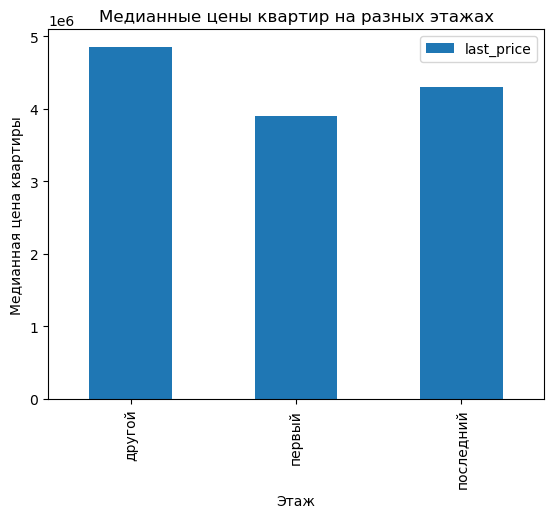

In [86]:
data_fl_pr = data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
data_fl_pr.plot(kind='bar')
plt.title('Медианные цены квартир на разных этажах')
plt.xlabel('Этаж')
plt.ylabel('Медианная цена квартиры') 
plt.show()

Значения колонки floor_category относятся к категориальным данным, подсчитать по ним корреляцию, без преобразования не получится. Был создан столбец new_floor_category, где значения "первый", "другой", "последний" заменены на 0, 1, 2 - соответственно. Согласно коэффициенту корреляции, между ценой недвижимости и категорией этажа есть прямая несильная корреляционная связь.

По построенной промежуточной табице и графику видно, что квартиры на первых этажах стоят дешевле других, а квартиры на последнем этаже хоть и дороже, чем на первом, но уступают в цене другим этажам.

#### 4.4 **Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [87]:
data_locality_price = data.pivot_table(index='new_locality_name', values='price_m2', aggfunc=['count', 'mean'])
data_locality_price.sort_values(by=('count', 'price_m2'), ascending=False).head(10)

,count,mean
,price_m2,price_m2
new_locality_name,,
санкт-петербург,15720,114818.146771
мурино,590,86087.512017
кудрово,472,95324.930508
шушары,440,78677.364318
всеволожск,398,68654.473970
пушкин,369,103125.819377
колпино,338,75424.579112
парголово,327,90175.913089


In [88]:
data_locality_price.sort_values(by=('mean', 'price_m2'), ascending=False).head(10)

,count,mean
,price_m2,price_m2
new_locality_name,,
зеленогорск,24,115122.799583
санкт-петербург,15720,114818.146771
репино,4,104238.612500
пушкин,369,103125.819377
сестрорецк,183,101757.616831
лисий нос,3,100660.816667
мистолово,11,98549.977273
левашово,1,96997.690000


In [89]:
data_locality_price.sort_values(by=('mean', 'price_m2'), ascending=False).tail(10)

,count,mean
,price_m2,price_m2
new_locality_name,,
житково,2,14956.275
ям-тесово,2,13711.555
сижно,1,13709.680
тесово-4,1,12931.030
малая романовка,1,12724.550
совхозный,2,12629.130
выскатка,2,12335.480
вахнова кара,1,11688.310


Ожидаемо, что большинство объявлений о продаже недвижимости сосредоточено в Санкт-Петербурге. Далее идут поселки, граничащие с городом и активно застраивающиеся, а также близлежащие к Санкт-Петербургу города.

Самая высокая средняя стоимость квадратного метра недвижимости в Ленинградской области в Зеленогорске (115122,79), следом за ним идет Санкт-Петербург (114818,14), также в список районов с высокой стоимостью недвижимости вошли Пушкин, Сестрорецк, Кудрово, Парголово. А вот попавшие в этот список Репино, Лисий нос, Мистолово, Левашово нужно изучать более детально. Объявлений в этих поселках немного, поэтому судить о средней стоимость за кв.м недвижимости по 1-10 объявлениям может быть неправильным (можно взять медиану. Но выборка все-равно мала).

В ТОП-10 поселков Ленинградской области с самой дешевой недвижимостью вошли поселки с очень малым количеством объявлений и на значительном удалении от Санкт-Петербурга. Это поселки и деревни:  Старополье, Свирь, Совхозный и др. 


#### 4.5 Выделите квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [90]:
st_petesberg = data.query('new_locality_name=="санкт-петербург"')
st_petesberg

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_category,cityCenters_km,new_floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0,1
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,True,...,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0,1
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,True,...,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0,1
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0,1
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,True,...,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23639,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.3,4,True,...,2.0,652.0,29.0,100566.57,2,2,2018,другой,16.0,1
23640,3,5500000,52.00,2018-07-19,2,2.65,5.0,31.0,2,True,...,0.0,NaN,15.0,105769.23,3,7,2018,другой,6.0,1
23641,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,True,...,1.0,806.0,519.0,129903.98,3,10,2016,другой,4.0,1
23644,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0,1


In [91]:
data_st_petesberg = st_petesberg.pivot_table(index='cityCenters_km', values='price_m2', aggfunc='mean')
data_st_petesberg

,price_m2
cityCenters_km,
0.0,245833.530370
1.0,177005.407604
2.0,157849.007290
3.0,121387.453743
4.0,133282.874738
5.0,140509.789022
6.0,151012.193673
7.0,156176.879524
8.0,124875.589581


In [92]:
st_petesberg.query('cityCenters_km==27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_category,cityCenters_km,new_floor_category
748,13,14350000,74.0,2017-11-28,2,3.13,5.0,30.0,3,True,...,0.0,NaN,128.0,193918.92,1,11,2017,другой,27.0,1
5951,6,2250000,32.0,2018-02-27,1,2.65,2.0,16.5,2,True,...,0.0,NaN,178.0,70312.50,1,2,2018,последний,27.0,2


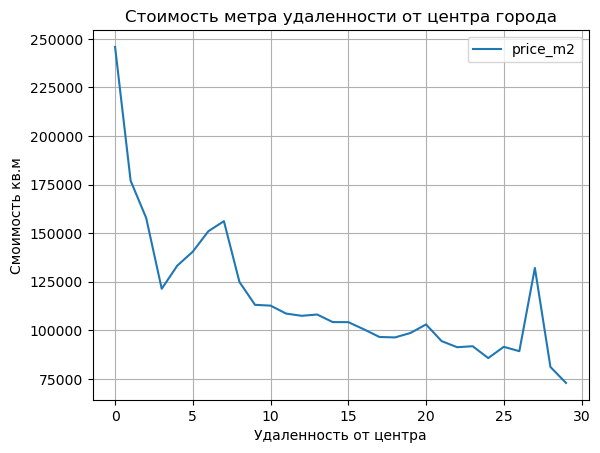

In [93]:
data_st_petesberg.plot(kind='line', grid = True, title = 'Стоимость метра удаленности от центра города')
plt.xlabel('Удаленность от центра')
plt.ylabel('Смоимость кв.м') 

plt.show()

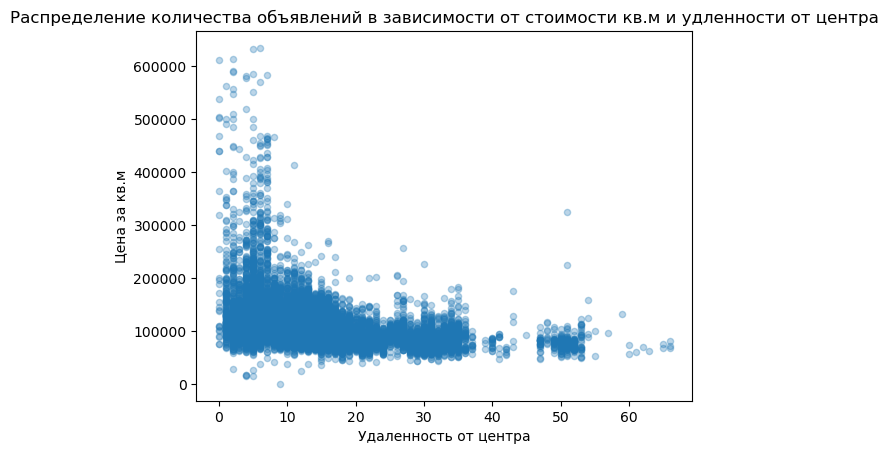

-0.31929840975873935

In [94]:
data[data['price_m2']<650000].plot(kind = 'scatter', y = 'price_m2', x = 'cityCenters_km', alpha = 0.3)
plt.title('Распределение количества объявлений в зависимости от стоимости кв.м и удленности от центра')
plt.xlabel('Удаленность от центра')
plt.ylabel('Цена за кв.м') 
plt.show()

data['cityCenters_km'].corr(data['price_m2'])


Можно наблюдать обратную зависимость между расстоянием от центра города и стоимостью кв.м недвижимости, т.е чем дальше от центра, тем дешевле кв.м.
Самая дорогая недвижимость расположена в самом центре Санкт-Петербурга (245833), но в районе 3-4км от цента стоимость резко падает. Возможно это связано с небольшим количеством объектов и их техническими характеристиками. На графике мы видим пик в районе 6-7 км от центра. Скорее всего такая цена связана с транспортной доступностью объектов и отностительной близостью к центру.
Далее график представляет собой убывающую линию. Пик на 27км от центра можно считать выбросом и не принимать во внимание. На этом расстоянии от центра продавалось только 2 объекта, один из них, скорее всего, элит-класса, и его цена сильно повлияла на среднее значение.


### Общий вывод

В ходе проекта был изучен архив объявлений о продаже квартир в Санкт-Петербурге  и соседних населённых пунктах за несколько лет. 

Во время предобработки были замечены многочисленные пропуски для таких данных, как, высота потолков, количество балконов, жилая площадь, площадь кухни, не заполнены данные о расстоянии до центра города, данные о близости прудов, парков, нет данных о принадлежности к апартаментам или о свободной планировке. Я связываю это с тем, что  данные первоначально не были заполнены пользователями, по незнанию или нежеланию, а также были возможны технические проблемы (некорректная выгрузка), отсутствие географических координат для корректной подгрузки данных о природных и географических объектах поблизости, либо объявления размещены давно и не корректировались после обновления программы.
Также были удалены дубликаты в названиях населенных пунктов.
Изучить параметры объектов недвижимости и время продажи объектов в регионе в целом.
В ходе работы над проектом были выявлены факторы, влияющие на стоимость объектов недвижимости, определены регионы с максимальной и минимальной стоимостью недвижимости.

Большинство квартир имеют площадь от 40 до 69,7 кв.м, от одной до трех комнат, с небольшой кухней в 7-12кв.м, стоимостью от 3,4 до 6,8 миллионов рублей, с невысокими потолками в 2,5-2,75м. Большинство квартир расположено в пятиэтажках. В застройке Санкт-Петербурга преобладают 5-ти, 9-ти этажные здания, также часто встречается застройка в 12, 16 и 24 этажа. Большинство объектов недвижимости находится на расстоянии 14 км от центра города и продается в промежутке 45-231 день

На стоимость объектов недвижимости в Санкт-Петербурге в большей степени влияет: общая площадь (т.е. чем больше площадь, тем выше цена), площадь кухни и жилая площадь, а также этаж. В большинстве случаев люди реже берут квартиры на первом этаже из-за их небезопасности и шума, а квартиры на последним - из-за возможных проблем с кровлей. Соответственно самыми дорогими являются квартиры на средних этажах.
А вот с днем, месяцем и годом подачи объявления стоимость недвижимости ни как не связана. 

Большинство объявлений о продаже недвижимости сосредоточено в Санкт-Петербурге. Далее идут поселки, граничащие с городом и активно застраивающиеся, а также близлежащие к Санкт-Петербургу города.
Самая высокая средняя стоимость квадратного метра недвижимости в Ленинградской области в Зеленогорске, Санкт-Петербурге, Пушкине, Сестрорецке, Кудрово, Парголово. 
Самая дешевая недвижимость в области, на значительном удалении от Санкт-Петербурга. Это поселки и деревни: Старополье, Свирь, Совхозный и др.
С каждым км отдаления от центра стоимость недвижимости за кв.м падает.
